## K-MEANS


### Library

In [1]:
import numpy as np # aljabar linear
import pandas as pd # pengolahan data, input/output file CSV (mis. pd.read_csv)
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # untuk visualisasi data statistik
%matplotlib inline

In [2]:
df = pd.read_csv("Live.csv") #import dataset

In [3]:
df #memanggil dataset

status_id status_type  status_published  \
0    246675545449582_1649696485147474       video    4/22/2018 6:00   
1    246675545449582_1649426988507757       photo   4/21/2018 22:45   
2    246675545449582_1648730588577397       video    4/21/2018 6:17   
3    246675545449582_1648576705259452       photo    4/21/2018 2:29   
4    246675545449582_1645700502213739       photo    4/18/2018 3:22   
..                                ...         ...               ...   
497  246675545449582_1122787121171749       photo  12/01/2016 12:35   
498  246675545449582_1121060898011038       video   11/30/2016 8:46   
499  246675545449582_1117028825080912       photo   11/27/2016 6:06   
500  246675545449582_1115512555232539       photo   11/26/2016 4:51   
501  246675545449582_1110381239079004       photo   11/22/2016 0:03   

     num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0              529           512         262        432         92         3   
1              150             0           0        150          0         0   
2              227           236          57        204         21         1   
3              111             0           0        111          0         0   
4              213             0           0        204          9         0   
..             ...           ...         ...        ...        ...       ...   
497            387             8           0        375          9         3   
498            564         20990         154        473         82         3   
499            261            36           1        256          5         0   
500            477            12           0        468          6         3   
501            154            19           7        153          1         0   

     num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0            1         1           0      NaN      NaN      NaN      NaN  
1            0         0           0      NaN      NaN      NaN      NaN  
2            1         0           0      NaN      NaN      NaN      NaN  
3            0         0           0      NaN      NaN      NaN      NaN  
4            0         0           0      NaN      NaN      NaN      NaN  
..         ...       ...         ...      ...      ...      ...      ...  
497          0         0           0      NaN      NaN      NaN      NaN  
498          3         3           0      NaN      NaN      NaN      NaN  
499          0         0           0      NaN      NaN      NaN      NaN  
500          0         0           0      NaN      NaN      NaN      NaN  
501          0         0           0      NaN      NaN      NaN      NaN  

[502 rows x 16 columns]

In [6]:
df.info() #melihat jenis kolom dan type data nya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         502 non-null    object 
 1   status_type       502 non-null    object 
 2   status_published  502 non-null    object 
 3   num_reactions     502 non-null    int64  
 4   num_comments      502 non-null    int64  
 5   num_shares        502 non-null    int64  
 6   num_likes         502 non-null    int64  
 7   num_loves         502 non-null    int64  
 8   num_wows          502 non-null    int64  
 9   num_hahas         502 non-null    int64  
 10  num_sads          502 non-null    int64  
 11  num_angrys        502 non-null    int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory us

In [7]:
df.isnull().sum()#untuk mengecek ada data yang hilang atau gak

status_id             0
status_type           0
status_published      0
num_reactions         0
num_comments          0
num_shares            0
num_likes             0
num_loves             0
num_wows              0
num_hahas             0
num_sads              0
num_angrys            0
Column1             502
Column2             502
Column3             502
Column4             502
dtype: int64

##### Kita dapat melihat bahwa ada 4 kolom di atas yang tidak memberikan kontribusi dalam dataset. Sebaiknya kita hapus sebelum melanjutkan lebih lanjut.

#### menghapus 4 kolom yang tidak ada kontribuusinya

In [8]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         502 non-null    object
 1   status_type       502 non-null    object
 2   status_published  502 non-null    object
 3   num_reactions     502 non-null    int64 
 4   num_comments      502 non-null    int64 
 5   num_shares        502 non-null    int64 
 6   num_likes         502 non-null    int64 
 7   num_loves         502 non-null    int64 
 8   num_wows          502 non-null    int64 
 9   num_hahas         502 non-null    int64 
 10  num_sads          502 non-null    int64 
 11  num_angrys        502 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 47.2+ KB


In [10]:
df.describe() 

num_reactions  num_comments  num_shares    num_likes   num_loves  \
count     502.000000    502.000000  502.000000   502.000000  502.000000   
mean      243.123506    193.637450   12.003984   226.739044   14.181275   
std       263.175413   1337.145146   42.474461   249.249319   25.253940   
min         7.000000      0.000000    0.000000     7.000000    0.000000   
25%       112.000000      4.000000    0.000000   104.000000    2.000000   
50%       207.000000      9.000000    0.000000   190.000000    6.000000   
75%       295.000000     25.000000    6.000000   276.000000   14.750000   
max      4410.000000  20990.000000  753.000000  4315.000000  234.000000   

         num_wows   num_hahas    num_sads  num_angrys  
count  502.000000  502.000000  502.000000  502.000000  
mean     1.358566    0.414343    0.298805    0.093625  
std      2.310895    1.112277    1.862102    0.469849  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      1.000000    0.000000    0.000000    0.000000  
75%      2.000000    0.000000    0.000000    0.000000  
max     21.000000    8.000000   23.000000    6.000000

In [11]:
df['status_id'].unique() # melihat data unik pada kolom status id

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397',
       '246675545449582_1648576705259452',
       '246675545449582_1645700502213739',
       '246675545449582_1645650162218773',
       '246675545449582_1645564175560705',
       '246675545449582_1644824665634656',
       '246675545449582_1644655795651543',
       '246675545449582_1638788379571618',
       '246675545449582_1637655039684952',
       '246675545449582_1636730006444122',
       '246675545449582_1635846033199186',
       '246675545449582_1635730986544024',
       '246675545449582_1632874756829647',
       '246675545449582_1628507150599741',
       '246675545449582_1626584134125376',
       '246675545449582_1622470701203386',
       '246675545449582_1619188648198258',
       '246675545449582_1617858078331315',
       '246675545449582_1617109651739491',
       '246675545449582_1617051285078661',
       '246675545449582_1615645795219210',
       '246

In [12]:
len(df['status_id'].unique())

502

In [14]:
df['status_published'].unique() # melihat data unik pada kolom status_published

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17',
       '4/21/2018 2:29', '4/18/2018 3:22', '4/18/2018 2:14',
       '4/18/2018 0:24', '4/17/2018 7:42', '4/17/2018 3:33',
       '04/11/2018 04:53', '04/10/2018 01:01', '04/09/2018 02:06',
       '04/08/2018 05:10', '04/08/2018 02:23', '04/05/2018 09:23',
       '04/01/2018 05:16', '3/30/2018 8:28', '3/26/2018 8:28',
       '3/23/2018 7:09', '3/22/2018 1:25', '3/21/2018 8:40',
       '3/21/2018 7:46', '3/20/2018 1:54', '3/20/2018 1:28',
       '3/20/2018 0:15', '3/19/2018 22:34', '3/17/2018 8:07',
       '3/17/2018 7:47', '03/12/2018 05:51', '03/09/2018 07:45',
       '03/09/2018 05:55', '03/07/2018 13:10', '03/07/2018 06:13',
       '03/07/2018 04:46', '03/05/2018 08:32', '03/05/2018 02:48',
       '03/02/2018 09:55', '2/28/2018 8:19', '2/28/2018 1:43',
       '2/26/2018 8:50', '2/25/2018 10:13', '2/21/2018 0:19',
       '2/19/2018 0:11', '2/18/2018 7:15', '2/17/2018 22:30',
       '2/17/2018 4:15', '2/15/2018 3:47', '2/14/

In [15]:
len(df['status_published'].unique()) #untuk menghitung jumlah nilai unik (unik) dalam kolom 'status_published' 

498

In [16]:
df['status_type'].unique()# melihat data unik pada kolom status_type

array(['video', 'photo', 'link', 'status'], dtype=object)

In [17]:
len(df['status_type'].unique()) #untuk menghitung jumlah nilai unik (unik) dalam kolom 'status_type' 

4

In [18]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True) #menghapus kolom status id dan status published karena kedua atribut tersebut tidak digunakan dalam analisis dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    502 non-null    object
 1   num_reactions  502 non-null    int64 
 2   num_comments   502 non-null    int64 
 3   num_shares     502 non-null    int64 
 4   num_likes      502 non-null    int64 
 5   num_loves      502 non-null    int64 
 6   num_wows       502 non-null    int64 
 7   num_hahas      502 non-null    int64 
 8   num_sads       502 non-null    int64 
 9   num_angrys     502 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 39.3+ KB


In [20]:
df.head() #untuk menampilkan 5 dataset teratas

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0       video            529           512         262        432         92   
1       photo            150             0           0        150          0   
2       video            227           236          57        204         21   
3       photo            111             0           0        111          0   
4       photo            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0

In [21]:
X = df #menentukan label x dan y

y = df['status_type']

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  #untuk mengubah variabel kategorikal menjadi nilai numerik.

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    502 non-null    int32
 1   num_reactions  502 non-null    int64
 2   num_comments   502 non-null    int64
 3   num_shares     502 non-null    int64
 4   num_likes      502 non-null    int64
 5   num_loves      502 non-null    int64
 6   num_wows       502 non-null    int64
 7   num_hahas      502 non-null    int64
 8   num_sads       502 non-null    int64
 9   num_angrys     502 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 37.4 KB


In [24]:
X.head()

status_type  num_reactions  num_comments  num_shares  num_likes  num_loves  \
0            3            529           512         262        432         92   
1            1            150             0           0        150          0   
2            3            227           236          57        204         21   
3            1            111             0           0        111          0   
4            1            213             0           0        204          9   

   num_wows  num_hahas  num_sads  num_angrys  
0         3          1         1           0  
1         0          0         0           0  
2         1          1         0           0  
3         0          0         0           0  
4         0          0         0           0

In [25]:
cols = X.columns

In [26]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler() #untuk melakukan penskalaan fitur pada data. Ini dapat bermanfaat untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa

X = ms.fit_transform(X)

In [27]:
X = pd.DataFrame(X, columns=[cols])

In [28]:
X.head()

status_type num_reactions num_comments num_shares num_likes num_loves  \
0    1.000000      0.118556     0.024393   0.347942  0.098654  0.393162   
1    0.333333      0.032478     0.000000   0.000000  0.033194  0.000000   
2    1.000000      0.049966     0.011243   0.075697  0.045729  0.089744   
3    0.333333      0.023620     0.000000   0.000000  0.024141  0.000000   
4    0.333333      0.046786     0.000000   0.000000  0.045729  0.038462   

   num_wows num_hahas  num_sads num_angrys  
0  0.142857     0.125  0.043478        0.0  
1  0.000000     0.000  0.000000        0.0  
2  0.047619     0.125  0.000000        0.0  
3  0.000000     0.000  0.000000        0.0  
4  0.000000     0.000  0.000000        0.0

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) #memanggil algoritma k-means untuk melakukan clustering pada data.

kmeans.fit(X)

C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\j\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\j\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

KMeans(n_clusters=2, random_state=0)

In [30]:
kmeans.cluster_centers_ #untuk mendapatkan koordinat pusat (centroid) dari masing-masing cluster setelah model K-Means dilatih.

array([[3.36206897e-01, 5.16921587e-02, 4.62179582e-04, 2.51484484e-03,
        5.11538277e-02, 2.37867178e-02, 6.36288998e-02, 1.07758621e-02,
        8.12093953e-03, 2.87356322e-03],
       [9.95670996e-01, 5.80020706e-02, 2.90274280e-02, 4.62824029e-02,
        5.06758794e-02, 1.43800644e-01, 6.70995671e-02, 1.44480519e-01,
        2.39977414e-02, 4.43722944e-02]])

In [31]:
kmeans.inertia_ #Nilai inersia lebih rendah menunjukkan bahwa cluster memiliki titik-titik yang lebih dekat satu sama lain.

32.52165670978738

In [32]:
labels = kmeans.labels_

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4 out of 502 samples were correctly labeled.


In [33]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size))) #mencetak nilai akurasi

Accuracy score: 0.01


C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

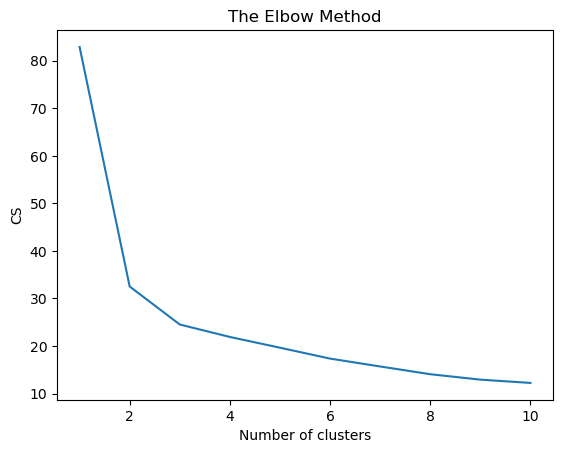

In [34]:
from sklearn.cluster import KMeans #untuk menentukan jumlah cluster yang optimal dalam model K-Means.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# Periksa berapa banyak sampel yang telah diberi label dengan benar.

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 4 out of 502 samples were correctly labeled.
Accuracy score: 0.01


In [36]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 7 out of 502 samples were correctly labeled.
Accuracy score: 0.01


In [37]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# Periksa berapa banyak sampel yang telah diberi label dengan benar.
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\j\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Result: 29 out of 502 samples were correctly labeled.
Accuracy score: 0.06
